# Know Data

### Install Packages

In [1]:
! pip install --quiet wordcloud-fa
! pip install -U --quiet swifter # upgrade to latest version if already installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 KB 994.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.7 MB/s eta 0:00:00


### Download and Unzip Dataset

In [2]:
!pip install --quiet --upgrade --no-cache-dir gdown

In [3]:
! gdown --id 1jkQ5P2-sJJon-wRR-YFDvPY9n0G0lqVT
! 7z e twitter_sample_tweets.csv.7z

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jkQ5P2-sJJon-wRR-YFDvPY9n0G0lqVT
To: /content/twitter_sample_tweets.csv.7z
100% 520M/520M [00:16<00:00, 31.8MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 520064545 bytes (496 MiB)

Extracting archive: twitter_sample_tweets.csv.7z
--
Path = twitter_sample_tweets.csv.7z
Type = 7z
Physical Size = 520064545
Headers Size = 154
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - twitter_sample_tweets.csv                                

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import swifter
sns.set()

### Read Data

In [30]:
columns = ["created_at", "tweet", "retweet", "fav", "user_id", "follower", "following", "tweets_count"]
twitter = pd.read_csv("twitter_sample_tweets.csv", on_bad_lines="skip", names=columns)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
print("Dataset shape:", twitter.shape)
twitter.head()

Dataset shape: (15795332, 8)


,created_at,tweet,retweet,fav,user_id,follower,following,tweets_count
0,2019-02-01 00:00:00,RT : به نظر شما وقتی #جرمی_هانت وزیر امورخارجه...,981,0,0,144,220,184
1,2019-02-01 00:00:00,RT : بنر تصاویر دیکتاتور توسط #کانونهای_شورشی ...,163,0,1,1589,981,31282
2,2019-02-01 00:00:00,RT : مشهد به واسطه وجود حرم مطهر امام رضا(ع) و...,60,0,2,380,418,3614
3,2019-02-01 00:00:00,عاخه تو مغزشون کردن هرکسی که مثلا از نظام انت...,0,1,3,466,708,5421
4,2019-02-01 00:00:00,نرم باشه لطفاً.,0,2,4,381,755,4084


In [32]:
twitter.drop(["user_id"], axis=1, inplace=True)

In [33]:
twitter = twitter[twitter["tweet"].notna()]
twitter.drop_duplicates(inplace=True)
print("Dataset shape:", twitter.shape)

Dataset shape: (15794859, 7)


In [34]:
original_tweet_length = len(twitter)

#### Percentage of retweets

In [35]:
len(twitter[twitter["tweet"].str.startswith("RT : ")])/original_tweet_length

0.38253510208606484

In [36]:
twitter["tweet"] = twitter["tweet"].str.replace("RT : ", "")

#### Average of twitter length

In [37]:
twitter['tweet_len'] = twitter["tweet"].apply(lambda x: len(x.split()))
sum(twitter['tweet_len'])/original_tweet_length

16.645365241943598

### Describe Twitter Dataset

In [38]:
twitter.describe().apply(lambda x: [int(item) for item in x], axis=0)

,fav,follower,following,tweets_count,tweet_len
count,15794859,15794859,15794859,15794859,15794859
mean,6,1826,680,11291,16
std,51,18010,2133,28171,13
min,0,0,0,0,0
25%,0,50,79,232,7
50%,0,323,257,2221,15
75%,1,1309,685,10588,23
max,14227,8942755,887849,2443020,5518


### Remove Duplicate Tweets and Unwanted Columns

In [39]:
twitter.drop(columns=["created_at", "retweet", "fav", "follower", "following", "tweets_count"], inplace=True)
twitter.drop_duplicates(inplace=True)
print("Dataset shape:", twitter.shape)

Dataset shape: (9849468, 2)


In [40]:
twitter.head()

,tweet,tweet_len
0,به نظر شما وقتی #جرمی_هانت وزیر امورخارجه بریت...,21
1,بنر تصاویر دیکتاتور توسط #کانونهای_شورشی به آت...,9
2,مشهد به واسطه وجود حرم مطهر امام رضا(ع) و تولی...,26
3,عاخه تو مغزشون کردن هرکسی که مثلا از نظام انت...,23
4,نرم باشه لطفاً.,3


### Remove Outliers

In [41]:
twitter = twitter[twitter["tweet_len"] < 65]

In [42]:
len(twitter)

9847995

#### Twitter Tweets Length Destribution

In [43]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = lambda text: get_display(arabic_reshaper.reshape(text))

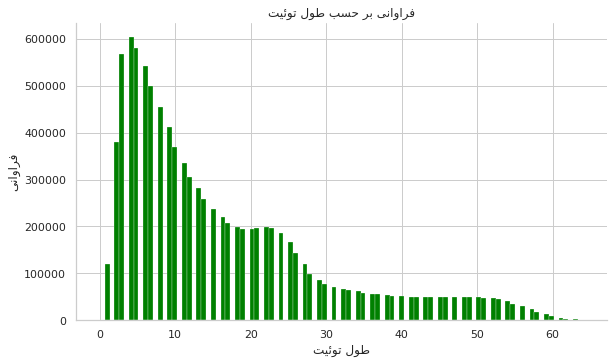

In [47]:
sns.set(style="whitegrid")
fig = sns.displot(twitter, x="tweet_len", color="green", alpha = 1, bins=100, kde=False)
fig.fig.set_size_inches(10, 5)
plt.xlabel(reshaped_text("طول توئیت"))
plt.ylabel(reshaped_text("فراوانی"))
plt.title(reshaped_text("فراوانی بر حسب طول توئیت"))

plt.show(fig)

### Sample Dataset

#### Remove outliers from tweet length prespective

In [48]:
twitter = twitter[(7 < twitter["tweet_len"]) & (twitter["tweet_len"] < 50)]
twitter_truncated_len = len(twitter)
twitter_truncated_len/original_tweet_length

0.3912560409687734

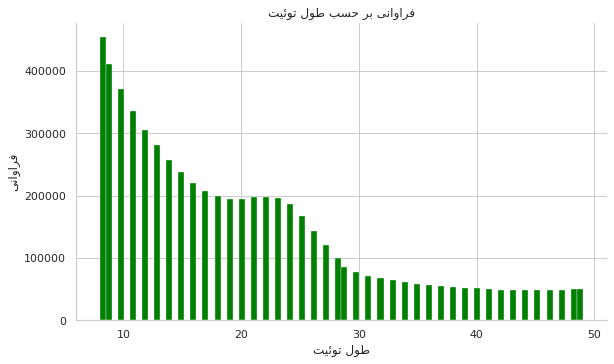

In [55]:
sns.set(style="whitegrid")
fig = sns.displot(twitter, x="tweet_len", color="green", alpha = 1, bins=80, kde=False)
fig.fig.set_size_inches(10, 5)
plt.xlabel(reshaped_text("طول توئیت"))
plt.ylabel(reshaped_text("فراوانی"))
plt.title(reshaped_text("فراوانی بر حسب طول توئیت"))

plt.show(fig)

### Uniform Sample from Dataset

In [56]:
twitter = twitter.sample(n = 10_000)

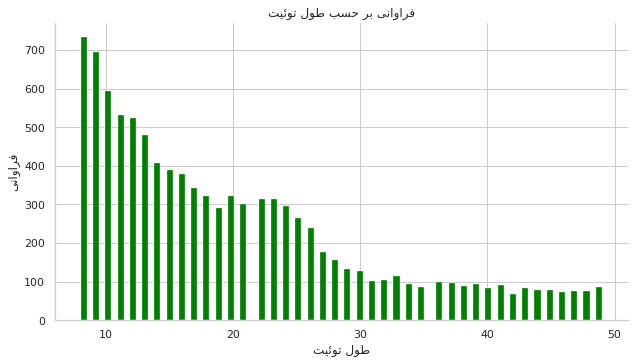

In [59]:
sns.set(style="whitegrid")
fig = sns.displot(twitter, x="tweet_len", color="green", alpha = 1, bins=85, kde=False)
fig.fig.set_size_inches(10, 5)
plt.xlabel(reshaped_text("طول توئیت"))
plt.ylabel(reshaped_text("فراوانی"))
plt.title(reshaped_text("فراوانی بر حسب طول توئیت"))

plt.show(fig)

#### Keep Tweets Only

In [ ]:
twitter = twitter['tweet']

#### Left tweets

In [ ]:
len(twitter)

10000

convert to dataframe

In [ ]:
twitter = twitter.to_frame().reset_index(drop = True)

### Save Dataset

In [ ]:
twitter.to_csv("twitter.csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mv twitter.csv drive/MyDrive/Thesis/Data

### Extract Hashtags

In [ ]:
def find_tags(row_string):
    # use a list comprehension to find list items that start with #
    tags = [x for x in row_string.split() if x.startswith('#')]
    
    return tags

In [ ]:
twitter['hashtags'] = twitter['tweet'].swifter.apply(lambda row : find_tags(row))

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
twitter.head()

,tweet,hashtags
0,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,[]
1,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,[]
2,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,[]
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,[]
4,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,[]


In [ ]:
from itertools import chain

hashtags_frequency = pd.Series(list(chain.from_iterable(twitter.hashtags.dropna()))).value_counts()
hashtags_frequency

#ایران           51
#چهل_سال         23
#اسماعیل_بخشی    22
#ونزوئلا         21
#براندازم        19
                 ..
#رادیو_فردا       1
#مشروطیت          1
#کامبیزحسینی      1
#پارادوکس         1
#ابوالبکاء        1
Length: 1732, dtype: int64

### Final Dataset Word Cloud

In [ ]:
from wordcloud_fa import WordCloudFa

wordcloud = WordCloudFa(
    persian_normalize=True, 
    include_numbers=False, 
    background_color="white", 
    width=1080, height=720).generate_from_frequencies(hashtags_frequency[:500])
image = wordcloud.to_image()
image.show()
image.save('word_cloud.png')

In [ ]:
! mv word_cloud.png drive/MyDrive/Thesis/Data